In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.test.is_built_with_cuda()

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#data = pd.read_csv('/content/drive/MyDrive/Kuliah S2/Semester IV/Tesis/Dataset/datasiap.csv')

Mounted at /content/drive


In [2]:
data = pd.read_csv('Datasets/datasiap.csv')

In [3]:
data = data.drop(['Unnamed: 0','Manufacturers','Ingredient','index','from','to'], axis=1)
#data = data.drop(['Manufacturers'], axis=1)
data.head(4)

,Labeling,Product
0,0,"3 ayam mie telor super merah, tepung terigu, g..."
1,0,"3 ayam mie telor super merah, tepung terigu, g..."
2,0,"3 ayam mie telor super merah, tepung terigu, g..."
3,0,"3 ayam mie telor super merah, tepung terigu, g..."


In [4]:
#Remove spec character
spec_chars = [","]
for char in spec_chars:
    data['Product'] = data['Product'].str.replace(char, '')
data.head(5)

,Labeling,Product
0,0,3 ayam mie telor super merah tepung terigu gar...
1,0,3 ayam mie telor super merah tepung terigu gar...
2,0,3 ayam mie telor super merah tepung terigu gar...
3,0,3 ayam mie telor super merah tepung terigu gar...
4,0,3 ayam mie telor super merah tepung terigu gar...


To list

In [5]:
produk = data['Product'].tolist()

**Nama Produk**

In [8]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(produk)]


In [9]:
doc2vec = Doc2Vec(documents, vector_size=100, window=5, min_count=5, workers=4)

In [10]:
doc2vec.save('Doc2Vec/finald2v.d2v')

In [11]:
def vectorOfTweet(tokens, doc2vec):
    if not len(tokens):
        return np.zeros(100)
    
    v = list()
    for token in tokens:
        if token in doc2vec:
            # If there is a coresponding vector in the model, add it to the list
            v.append(doc2vec[token])
        else:
            # else, make a random one
            v.append((np.random.rand(100)*2 - 1)) # p.x. len(w2vModel['obama']) 
    
    # Compute the mean vector
    summ = np.zeros(100) #
    for vector in v:
        summ += vector
    return summ/len(v)   

In [12]:
vectors = list()
# for every tweet
for index, row in data.iterrows():
    vectors.append(vectorOfTweet(data.loc[index,'Product'], doc2vec.dv)) 

# Save the vectors as a new column in the dataframe
data['d2v'] = pd.Series(vectors,index=data.index)

In [20]:
data.head()

,Labeling,Product,d2v
0,0,3 ayam mie telor super merah tepung terigu gar...,"[0.06065113211129497, -0.08040774390711498, -0..."
1,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.0388007718167507, 0.02524793524616838, -0...."
2,0,3 ayam mie telor super merah tepung terigu gar...,"[0.020980492596234575, -0.0797251999656853, 0...."
3,0,3 ayam mie telor super merah tepung terigu gar...,"[0.011089729332412724, -0.06473480556405574, 0..."
4,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.029531445100057084, 0.00023660927846955797..."


In [21]:
data.to_csv('Doc2Vec/finaldata.csv')

In [13]:
#data1 = data.sort_values(by=['Labeling'])

In [8]:
#data1 = pd.read_csv('Doc2Vec/finaldata.csv')
#data1 = data1.drop(['Product','d2v'], axis=1)
data1 = data1.drop(['Unnamed: 0'], axis=1)
data1.head()

,Labeling
0,0
1,0
2,0
3,0
4,0


In [10]:
#data2 = pd.read_csv('Similarity/HasilJacW2v.csv')
data2 = data2.drop(['Unnamed: 0'], axis=1)
data2

,HasilW2v
0,0.280296
1,0.184017
2,0.151157
3,0.117567
4,0.228217
5,0.123445
6,0.167068
7,0.195944
8,0.151157
9,0.176350


In [16]:
data2 = data2.drop(['Unnamed: 0'], axis=1)

In [13]:
dataku = pd.concat([data1, datap], axis=1)
dataku.head()

,Labeling,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.060651,-0.080408,-0.016207,-0.006125,0.122033,-0.033556,-0.016717,0.009990,0.021042,...,0.001175,0.029524,0.006983,0.013497,0.044514,0.018122,-0.024575,-0.017926,0.028998,0.013802
1,0,-0.038801,0.025248,-0.038105,-0.018971,0.038034,-0.028987,-0.057240,-0.041901,-0.029178,...,-0.016039,-0.016579,-0.025999,0.010321,-0.054263,0.058109,-0.056262,-0.000256,-0.094977,0.021427
2,0,0.020980,-0.079725,0.074119,-0.034402,-0.039575,-0.071405,0.018521,0.027709,-0.039693,...,-0.048501,0.166382,-0.049035,0.004278,0.031049,0.030345,0.060308,0.011592,0.042175,-0.046343
3,0,0.011090,-0.064735,0.004359,-0.048438,0.106239,-0.012999,-0.036631,-0.009643,-0.041744,...,0.001380,0.050192,0.046026,-0.071767,-0.011070,0.005928,0.045177,0.068705,0.056596,0.030138
4,0,-0.029531,0.000237,-0.009750,0.047080,0.025316,-0.042982,-0.028329,-0.023697,-0.053272,...,0.013473,-0.031274,-0.007442,0.030878,-0.065198,-0.005427,0.002862,-0.042255,0.044260,-0.021128


In [12]:
datap = pd.read_csv('Doc2Vec/d2vtranpose.csv')
datap = datap.drop(['Unnamed: 0'], axis=1)
datap.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.060651,-0.080408,-0.016207,-0.006125,0.122033,-0.033556,-0.016717,0.009990,0.021042,-0.006561,...,0.001175,0.029524,0.006983,0.013497,0.044514,0.018122,-0.024575,-0.017926,0.028998,0.013802
1,-0.038801,0.025248,-0.038105,-0.018971,0.038034,-0.028987,-0.057240,-0.041901,-0.029178,-0.036681,...,-0.016039,-0.016579,-0.025999,0.010321,-0.054263,0.058109,-0.056262,-0.000256,-0.094977,0.021427
2,0.020980,-0.079725,0.074119,-0.034402,-0.039575,-0.071405,0.018521,0.027709,-0.039693,0.048661,...,-0.048501,0.166382,-0.049035,0.004278,0.031049,0.030345,0.060308,0.011592,0.042175,-0.046343
3,0.011090,-0.064735,0.004359,-0.048438,0.106239,-0.012999,-0.036631,-0.009643,-0.041744,0.012551,...,0.001380,0.050192,0.046026,-0.071767,-0.011070,0.005928,0.045177,0.068705,0.056596,0.030138
4,-0.029531,0.000237,-0.009750,0.047080,0.025316,-0.042982,-0.028329,-0.023697,-0.053272,-0.007557,...,0.013473,-0.031274,-0.007442,0.030878,-0.065198,-0.005427,0.002862,-0.042255,0.044260,-0.021128


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [16]:
import matplotlib.pyplot as plt

**Random Forest Classifier**

In [69]:
#RsnfomForest
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = dataku.loc[:, dataku.columns != 'Labeling']
        y = dataku.loc[:, dataku.columns == 'Labeling']
        y = y ['Labeling']

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.9474
Precision Random Forest with Train size 0.70 : 0.9612
Recall Random Forest with Train size 0.70 : 0.9340
Accuracy Random Forest with Train size 0.70 : 0.9482
F1-Score Random Forest with Train size 0.70 : 0.8975
Precision Random Forest with Train size 0.70 : 0.9823
Recall Random Forest with Train size 0.70 : 0.8261
Accuracy Random Forest with Train size 0.70 : 0.9379
F1-Score Random Forest with Train size 0.70 : 0.8703
Precision Random Forest with Train size 0.70 : 0.9972
Recall Random Forest with Train size 0.70 : 0.7720
Accuracy Random Forest with Train size 0.70 : 0.9450


**SVM Classifier**

In [72]:
#SVM Classifier
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.2]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = dataku.loc[:, dataku.columns != 'Labeling']
        y = dataku.loc[:, dataku.columns == 'Labeling']
        y = y ['Labeling']

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.20 : 0.8152
Precision Random Forest with Train size 0.20 : 0.7825
Recall Random Forest with Train size 0.20 : 0.8508
Accuracy Random Forest with Train size 0.20 : 0.8084
F1-Score Random Forest with Train size 0.20 : 0.7548
Precision Random Forest with Train size 0.20 : 0.7959
Recall Random Forest with Train size 0.20 : 0.7177
Accuracy Random Forest with Train size 0.20 : 0.8443
F1-Score Random Forest with Train size 0.20 : 0.7172
Precision Random Forest with Train size 0.20 : 0.8424
Recall Random Forest with Train size 0.20 : 0.6243
Accuracy Random Forest with Train size 0.20 : 0.8793


In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

SMOTE

In [73]:
#Smote for ss 0.02
RF = RandomForestClassifier()

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.9399255715045188
Precision =  0.95361380798274
Recall =  0.9266247379454927
Accuracy =  0.9408995815899581


In [74]:
#Smote for ss 0.05
RF = RandomForestClassifier()

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.9734476270123353
Precision =  0.9773299748110831
Recall =  0.9695960016659725
Accuracy =  0.9734365195565782


In [75]:
#Smote SVM for ss 0.02
SVM = SVC()

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.9409368635437881
Precision =  0.9148514851485149
Recall =  0.9685534591194969
Accuracy =  0.9393305439330544


In [76]:
#SMOTE 0.05

SVM = SVC()

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.9862224964013984
Precision =  0.9740048740861088
Recall =  0.9987505206164098
Accuracy =  0.9859861953566199


Tuning Parameters

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 400, 1000]},
             scoring='f1')

In [84]:
#RandomForest Tuning Parameters

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
datag = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [85]:
datag.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='f1')

In [87]:
datag.best_params_

{'criterion': 'entropy', 'max_depth': 90, 'n_estimators': 100}

In [88]:
RF = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.9804200326982629


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search
import matplotlib.pyplot as plt

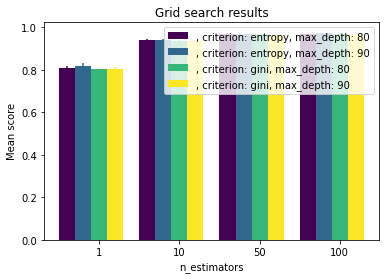

In [91]:
grid_search(datag.cv_results_, change='n_estimators', kind='bar')
plt.show()

In [92]:
#SVM Tuning Parameters

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

param_grid = {
    'C': [1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4]
}
# Create a based model
SVM = SVC()
# Instantiate the grid search model
dataku2 = GridSearchCV(estimator = SVM, param_grid = param_grid, scoring='f1', cv = 5)

In [93]:
dataku2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [94]:
dataku2.best_params_

{'C': 2.0, 'degree': 1, 'kernel': 'rbf'}

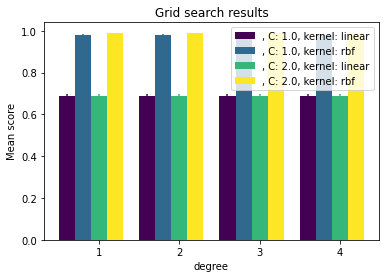

In [95]:
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

In [96]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')
SVM.fit(X_train, y_train)
            
predict = SVM.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())

0.9954257646135491


Perbandingan Performa terbaik

In [101]:
#Model Default

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.98150432 0.97924528 0.98142217 0.97895068 0.97574627]
0.9804883370511266
[0.98304039 0.97955332 0.97692308 0.97741531 0.97645601]
0.9798918140854551
[0.98428351 0.9814407  0.98044245 0.97800126 0.9764268 ]
0.9793246412469744
[0.98302993 0.9782814  0.97784912 0.97759546 0.97418351]
0.9800136638486565


In [100]:
#Model dengan Tuning parameter RandomForest

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.98277983 0.98363751 0.98112    0.98556183 0.98273736]
0.9842614215016763
[0.98245614 0.98268807 0.98210863 0.98306148 0.98147004]
0.9844364703394671
[0.98462485 0.98295455 0.98404595 0.98402756 0.98084054]
0.9839313094367161
[0.98219767 0.98173804 0.98337596 0.98431619 0.98272671]
0.9834348338222595


In [102]:
#Model Default SVM

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC()

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.98871607 0.9906367  0.98983482 0.99127726 0.98589822]
0.9892726144731501
[0.98871607 0.9906367  0.98983482 0.99127726 0.98589822]
0.9892726144731501
[0.98871607 0.9906367  0.98983482 0.99127726 0.98589822]
0.9892726144731501
[0.98871607 0.9906367  0.98983482 0.99127726 0.98589822]
0.9892726144731501


In [106]:
#Model dengan Tuning parameter SVM

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.99417357 0.9931164  0.99425654 0.99406435 0.99597648]
0.9943174671612454
[0.99417357 0.9931164  0.99425654 0.99406435 0.99597648]
0.9943174671612454
[0.99417357 0.9931164  0.99425654 0.99406435 0.99597648]
0.9943174671612454
[0.99417357 0.9931164  0.99425654 0.99406435 0.99597648]
0.9943174671612454


Model dengan performa terbaik

In [104]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')

In [105]:
#Random Forest
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())

[0.98499234 0.98085974 0.98069498 0.98521548 0.98851288]
0.9819447572022779
[0.98650769 0.98023219 0.98242862 0.98305617 0.98681733]
0.983180848278996
[0.97984117 0.97744361 0.98008992 0.98600509 0.98752339]
0.9827645129617115
[0.9919852  0.98298677 0.9801027  0.97925833 0.99005594]
0.9833588571603202


In [107]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

In [108]:
#SVM
kFold = 5
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall").mean())

[0.9963145  0.99467252 0.9952092  0.99313358 0.99566832]
0.9949996221918228
[0.9962347  0.99466583 0.99529338 0.99309696 0.99560578]
0.9949793288845477
[0.99265606 0.9894015  0.99046408 0.98636082 0.991374  ]
0.9900512907005334
[1. 1. 1. 1. 1.]
1.0


Visualisasi ROC

In [110]:
X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 98.112%
F1-Score NB with Train size 0.70 : 99.317%


In [17]:
X = dataku.loc[:, dataku.columns != 'Labeling']
y = dataku.loc[:, dataku.columns == 'Labeling']
y = y ['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 98.022%
F1-Score NB with Train size 0.70 : 99.338%


In [18]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
svm_probs1 = SVM.predict_proba(X_test)
svm_probs1 = svm_probs1[:, 1]

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [113]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))


Random Forest = 0.999
SVM = 1.000


In [20]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))

Random Forest = 0.998
SVM = 1.000


In [21]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, svm_probs1)

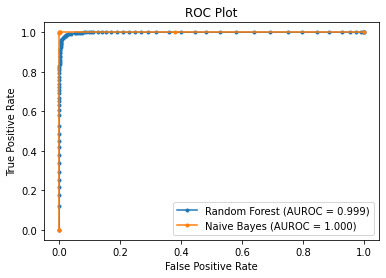

In [115]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'Naive Bayes (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

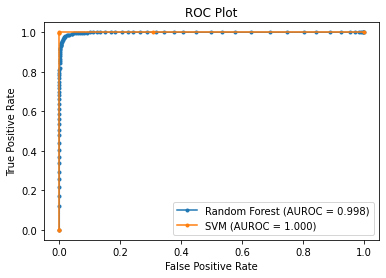

In [22]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'SVM (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()